# Consolidate all models and make cross models comparison

## Define device for Torch - preferred CUDA for accelerated computation

In [13]:
# Matplotlib
import torch

# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


## Load test dataset and dataloader

In [14]:

from utils.dataset import (
    load_dataset,
    CustomDataset
)
from torch.utils.data import Dataset, DataLoader

In [15]:
# Load dataset from file
train_file_path = './dataset/train/DailyDelhiClimateTrain.csv'
test_file_path = './dataset/test/DailyDelhiClimateTest.csv'
train_data, test_data, stats = load_dataset(train_path=train_file_path,
                                            test_path=test_file_path)

In [16]:
# Define batch size
batch_size = 128
n_inputs = 30
n_outputs = 7

# Random number generator (for reproducibility)
generator = torch.Generator()  # Defaults to CPU, which DataLoader expects

test_dataset = CustomDataset(test_data, n_inputs, n_outputs)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # Important: don't shuffle test data
    generator=generator
)

## Load models for evaluation and visualization

### Model 1: Seq2Seq Non Autoregressive model using LSTM

### Load optimal hypermarameters

In [17]:
import sys
import os

from config.config_LSTM import (
    INPUT_SIZE,
    HIDDEN_SIZE,
    OUTPUT_SIZE,
    LEARNING_RATE,
    NUMBER_LAYERS,
    DROPOUT_RATE,
    N_OUTPUTS,
    N_INPUTS,
    NUM_EPOCHS
)

print("INPUT_SIZE:", INPUT_SIZE)
print("HIDDEN_SIZE:", HIDDEN_SIZE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("LEARNING_RATE:", LEARNING_RATE)
print("NUMBER_LAYERS:", NUMBER_LAYERS)
print("DROPOUT_RATE:", DROPOUT_RATE)
print("N_OUTPUTS:", N_OUTPUTS)
print("N_INPUTS:", N_INPUTS)
print("NUM_EPOCHS:", NUM_EPOCHS)

INPUT_SIZE: 4
HIDDEN_SIZE: 100
OUTPUT_SIZE: 4
LEARNING_RATE: 0.001
NUMBER_LAYERS: 2
DROPOUT_RATE: 0.1
N_OUTPUTS: 7
N_INPUTS: 30
NUM_EPOCHS: 600


#### Load model

In [18]:
import torch

# Step 1: Rebuild the model architecture
from model_architecture_definition.seq2seq_non_autoregressive_LSTM import Seq2SeqLSTM  # update this line accordingly

# Hyperparameters
input_size = INPUT_SIZE
hidden_size = HIDDEN_SIZE
output_size = OUTPUT_SIZE
learning_rate = LEARNING_RATE
num_layers = NUMBER_LAYERS
dropout_rate = DROPOUT_RATE
n_outputs= N_OUTPUTS

# Initialize Seq2Seq Model
seq2seq_model_non_autoreg_lstm = Seq2SeqLSTM(input_size=input_size,
                            output_size=output_size,
                            hidden_size = hidden_size, \
                            output_length=n_outputs,
                            num_layers=num_layers).to(device)

seq2seq_model_non_autoreg_lstm.load_state_dict(torch.load('./models_weights_storage/seq2seq_non_autoregressive_LSTM.pth'))
seq2seq_model_non_autoreg_lstm.eval()  # important for inference mode


Seq2SeqLSTM(
  (encoder): EncoderLSTM(
    (lstm): LSTM(4, 100, num_layers=2)
  )
  (decoder): DecoderLSTM(
    (lstm): LSTM(4, 100, num_layers=2)
    (linear): Linear(in_features=100, out_features=4, bias=True)
  )
)

#### Load loss curve

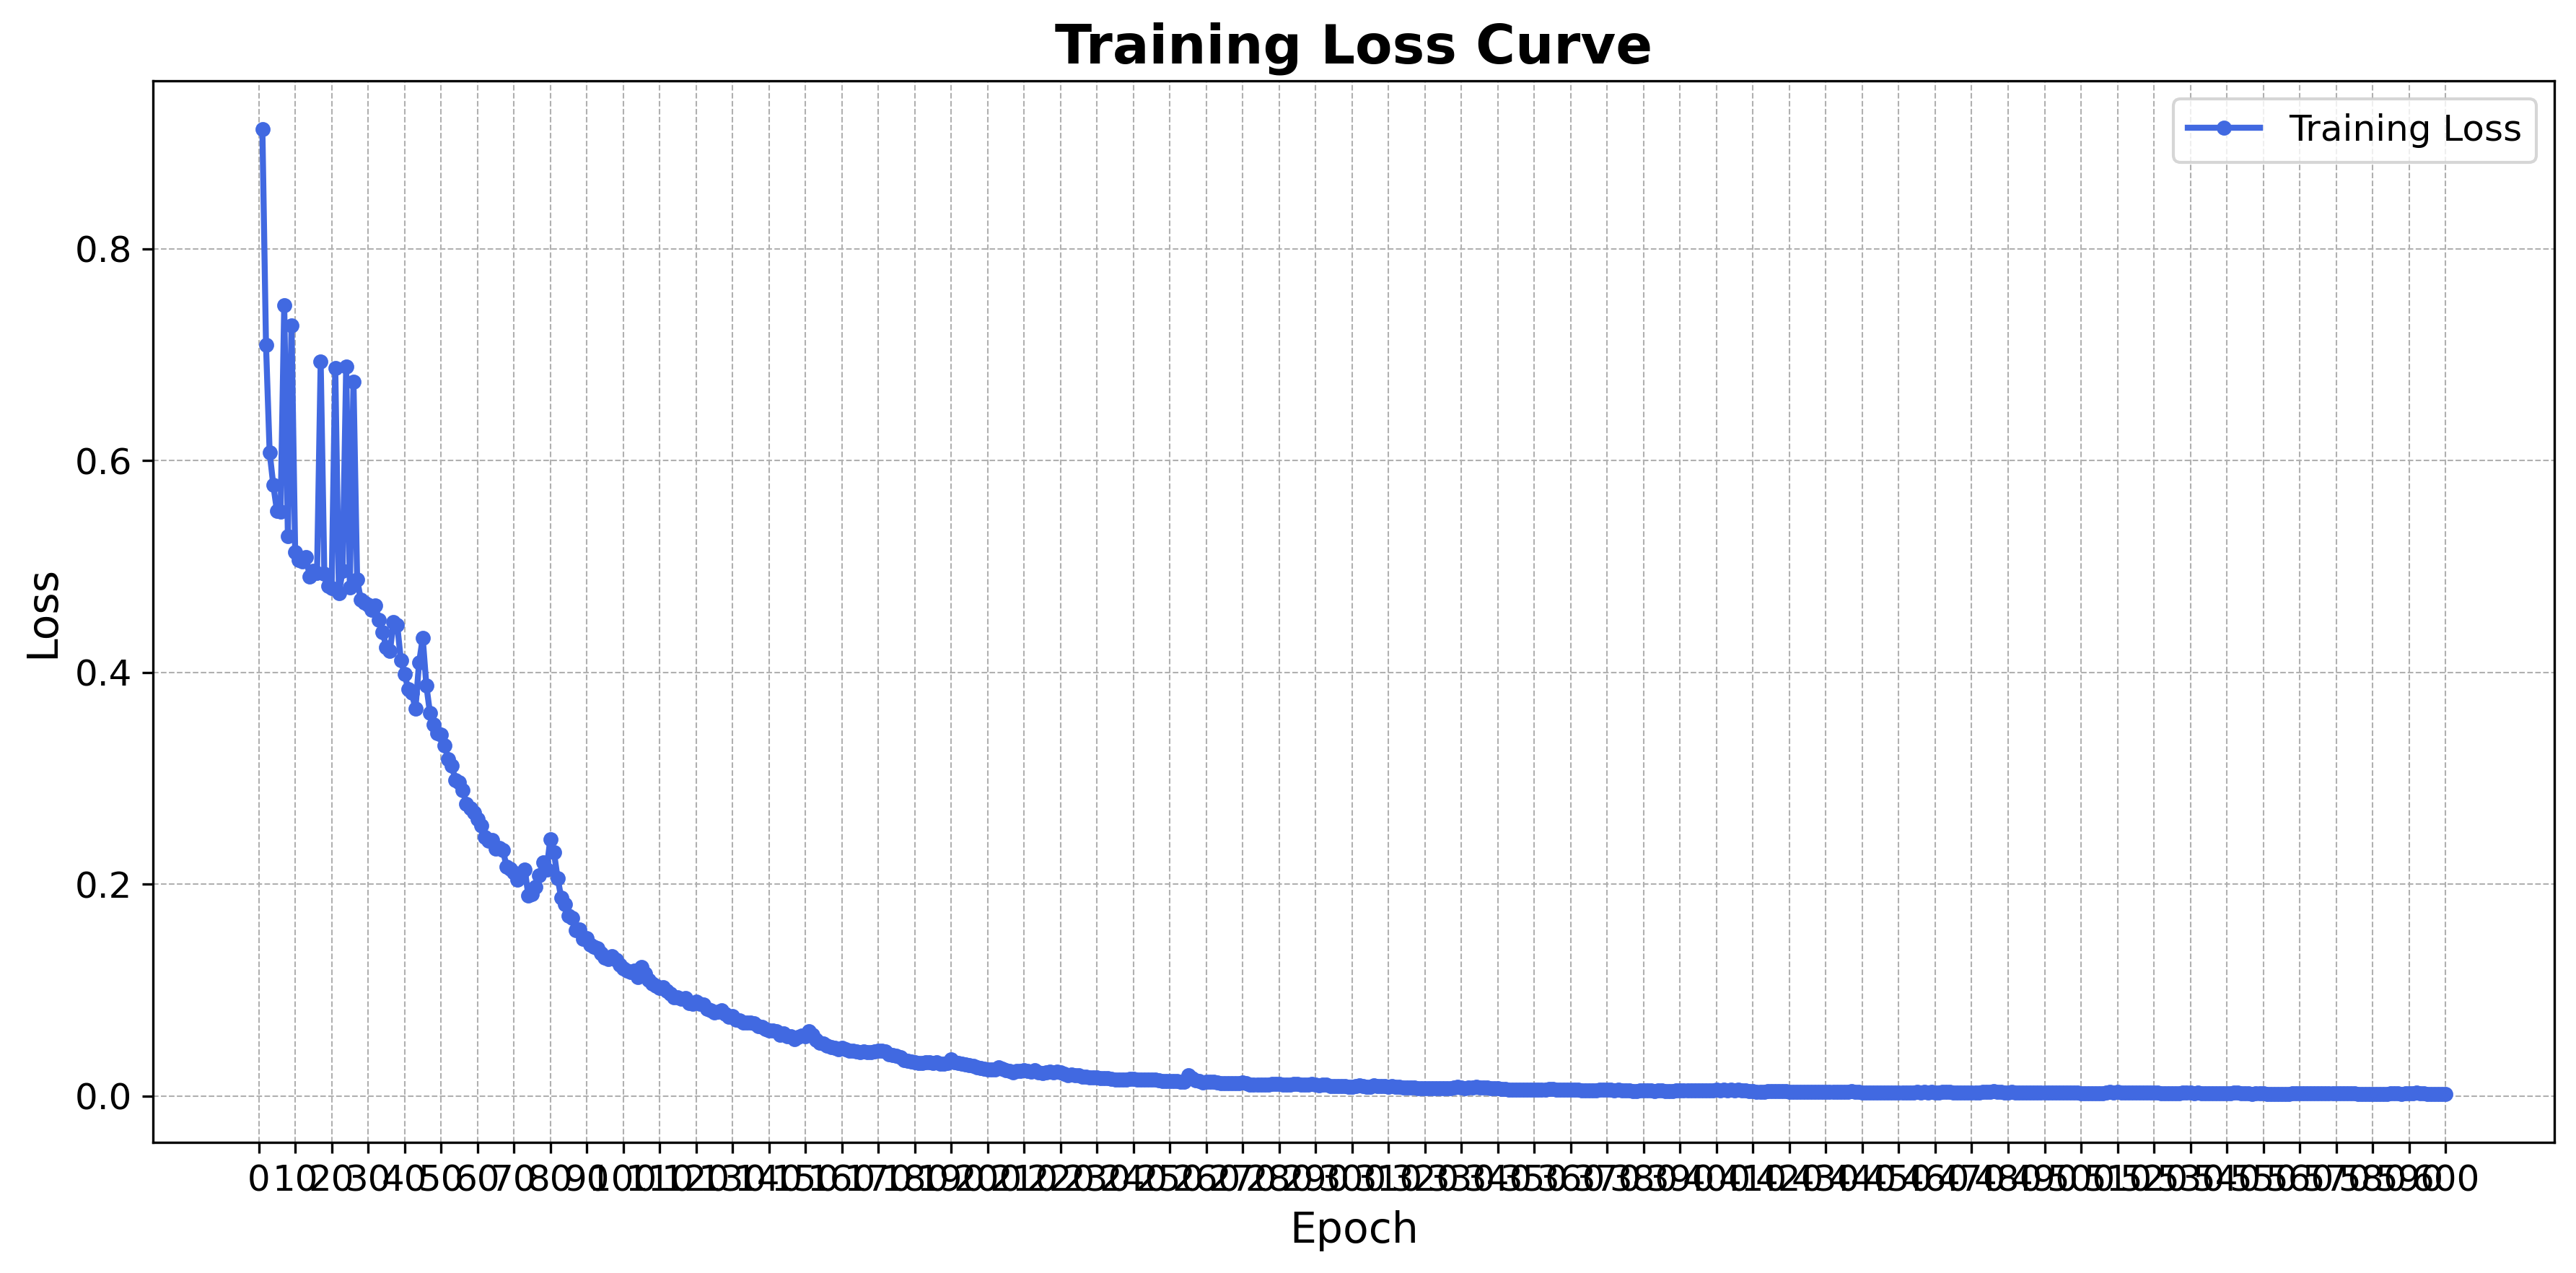

In [19]:
from utils.utils import load_image

image_path='./images_model_training_and_eval/seq2seq_non_autoregressive_LSTM_loss_training_curve.png'

load_image(image_path)

#### Model evaluation

In [20]:
from utils.model_evaluation import model_evaluation_and_visualizations

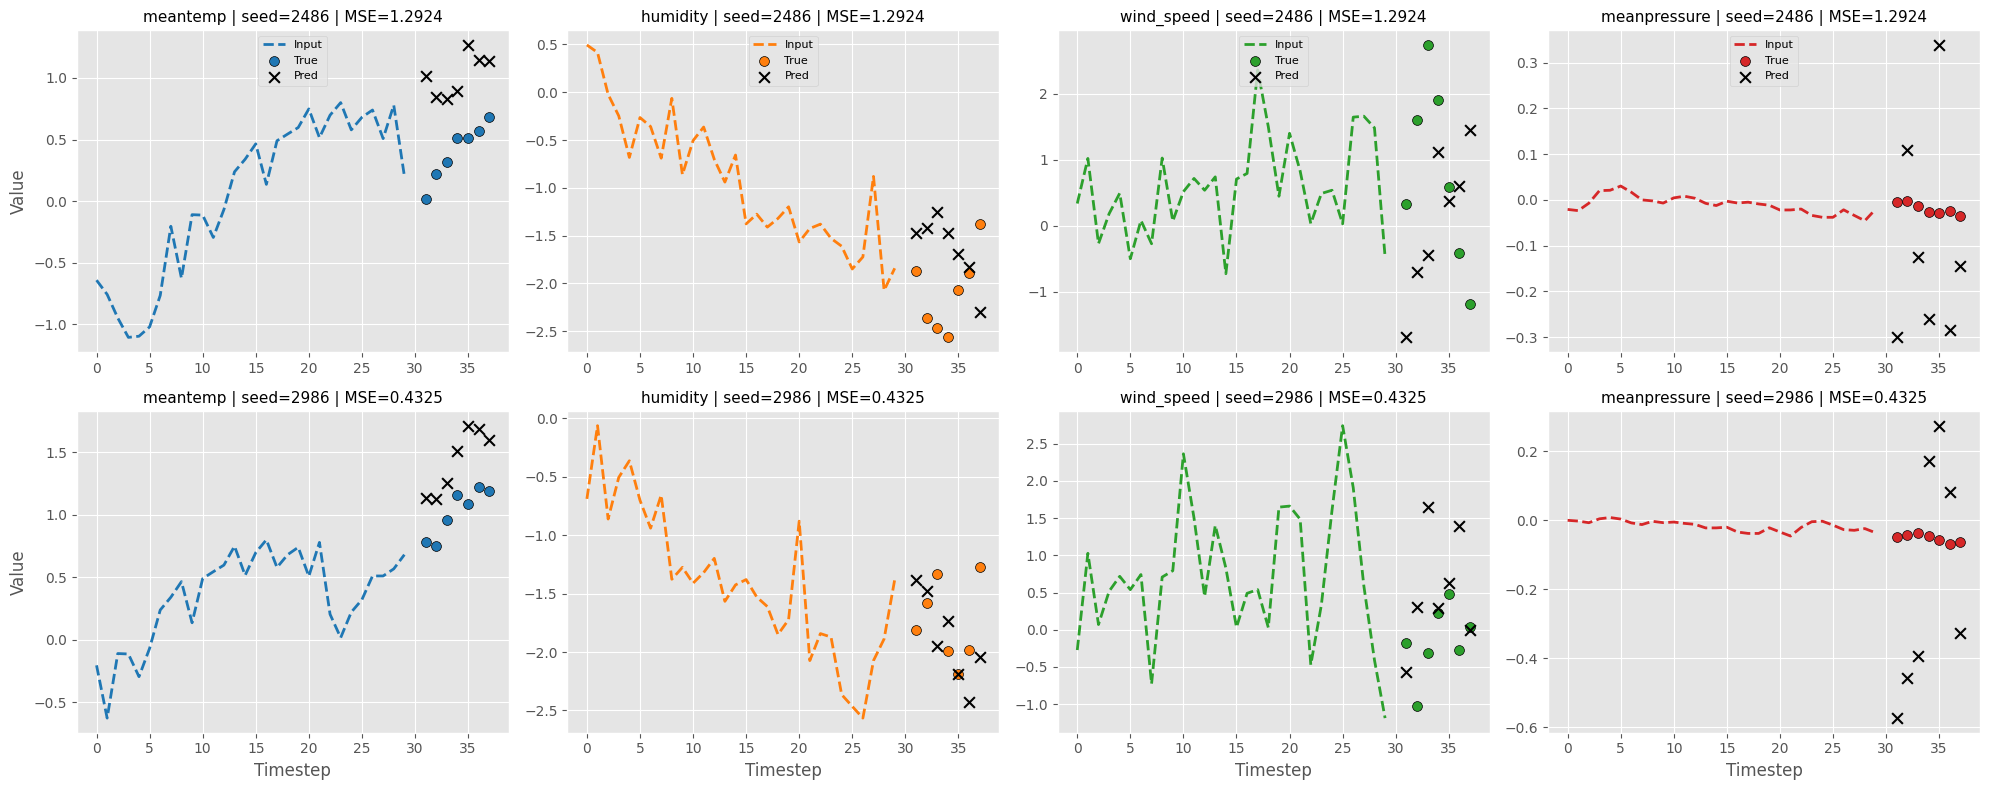

In [21]:
# Visualize
model_evaluation_and_visualizations(seq2seq_model_non_autoreg_lstm, test_dataloader, device)

### Model 2: Seq2Seq Autoregressive model using LSTM

#### Load model

In [22]:
import torch

# Step 1: Rebuild the model architecture
from model_architecture_definition.seq2seq_non_autoregressive_LSTM import Seq2SeqLSTM  # update this line accordingly

# Hyperparameters
input_size = INPUT_SIZE
hidden_size = HIDDEN_SIZE
output_size = OUTPUT_SIZE
learning_rate = LEARNING_RATE
num_layers = NUMBER_LAYERS
dropout_rate = DROPOUT_RATE
n_outputs= N_OUTPUTS

# Initialize Seq2Seq Model
seq2seq_model_autoreg_lstm = Seq2SeqLSTM(input_size=input_size,
                            output_size=output_size,
                            hidden_size = hidden_size, \
                            output_length=n_outputs,
                            num_layers=num_layers).to(device)

seq2seq_model_autoreg_lstm.load_state_dict(torch.load('./models_weights_storage/seq2seq_autoregressive_LSTM.pth'))
seq2seq_model_autoreg_lstm.eval()  # important for inference mode


Seq2SeqLSTM(
  (encoder): EncoderLSTM(
    (lstm): LSTM(4, 100, num_layers=2)
  )
  (decoder): DecoderLSTM(
    (lstm): LSTM(4, 100, num_layers=2)
    (linear): Linear(in_features=100, out_features=4, bias=True)
  )
)

#### Load loss curve image

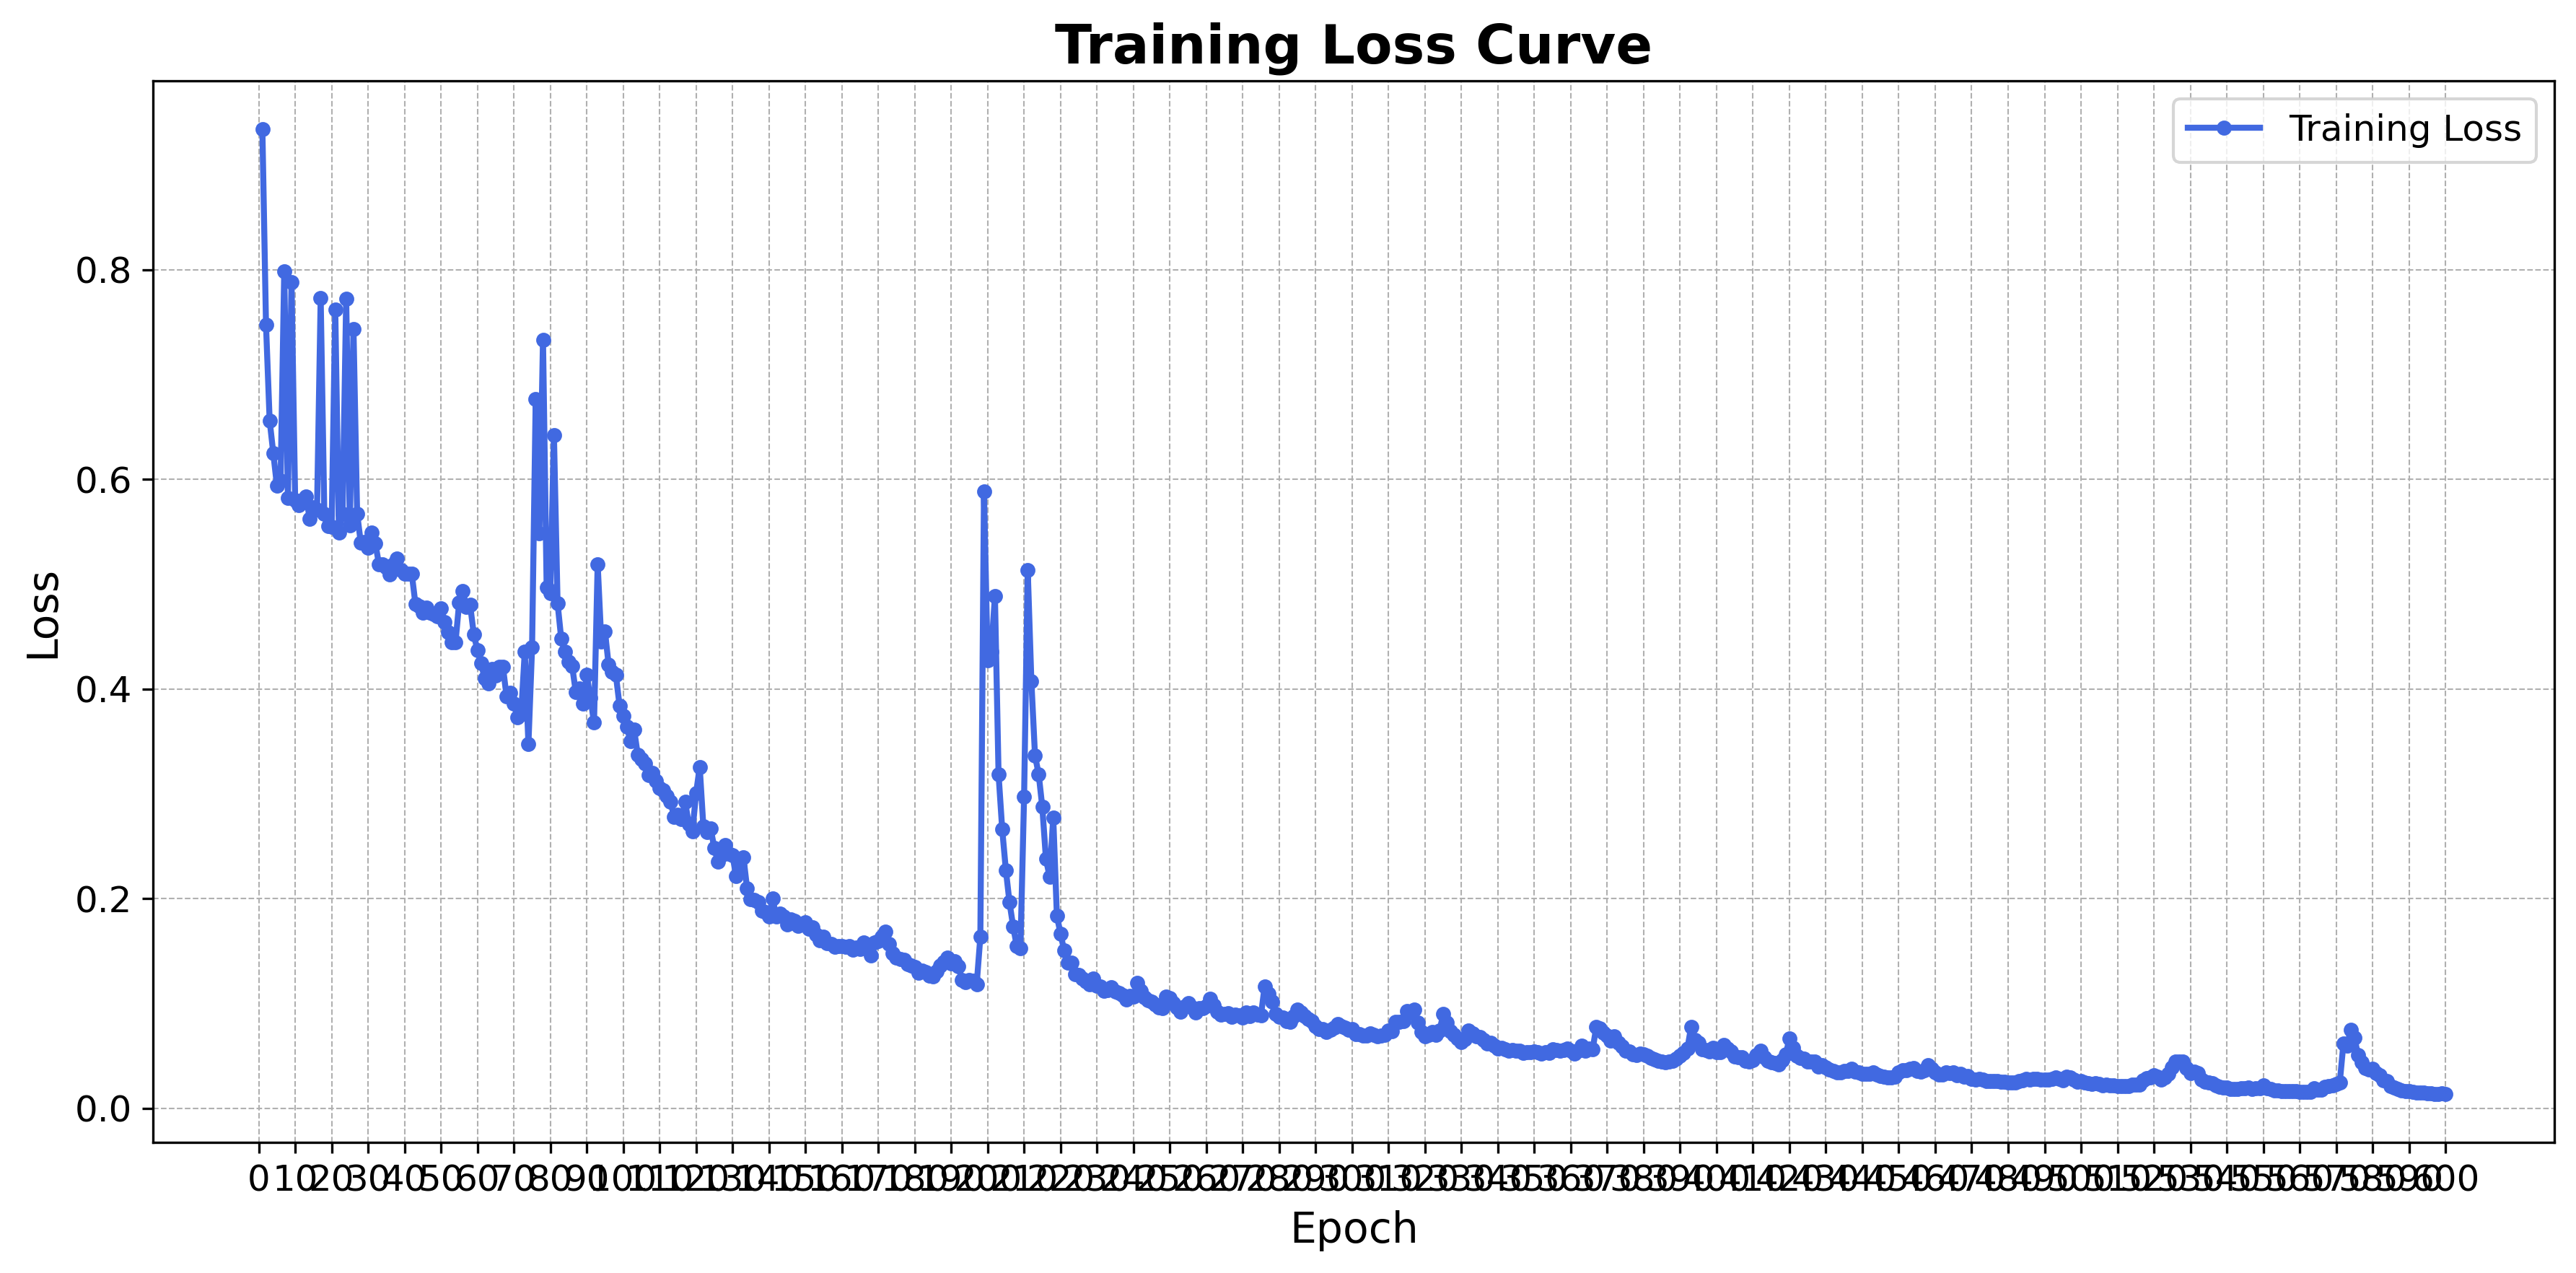

In [23]:
from utils.utils import load_image

image_path='./images_model_training_and_eval/seq2seq_autoregressive_LSTM_loss_training_curve.png'

load_image(image_path)

#### Model evaluation

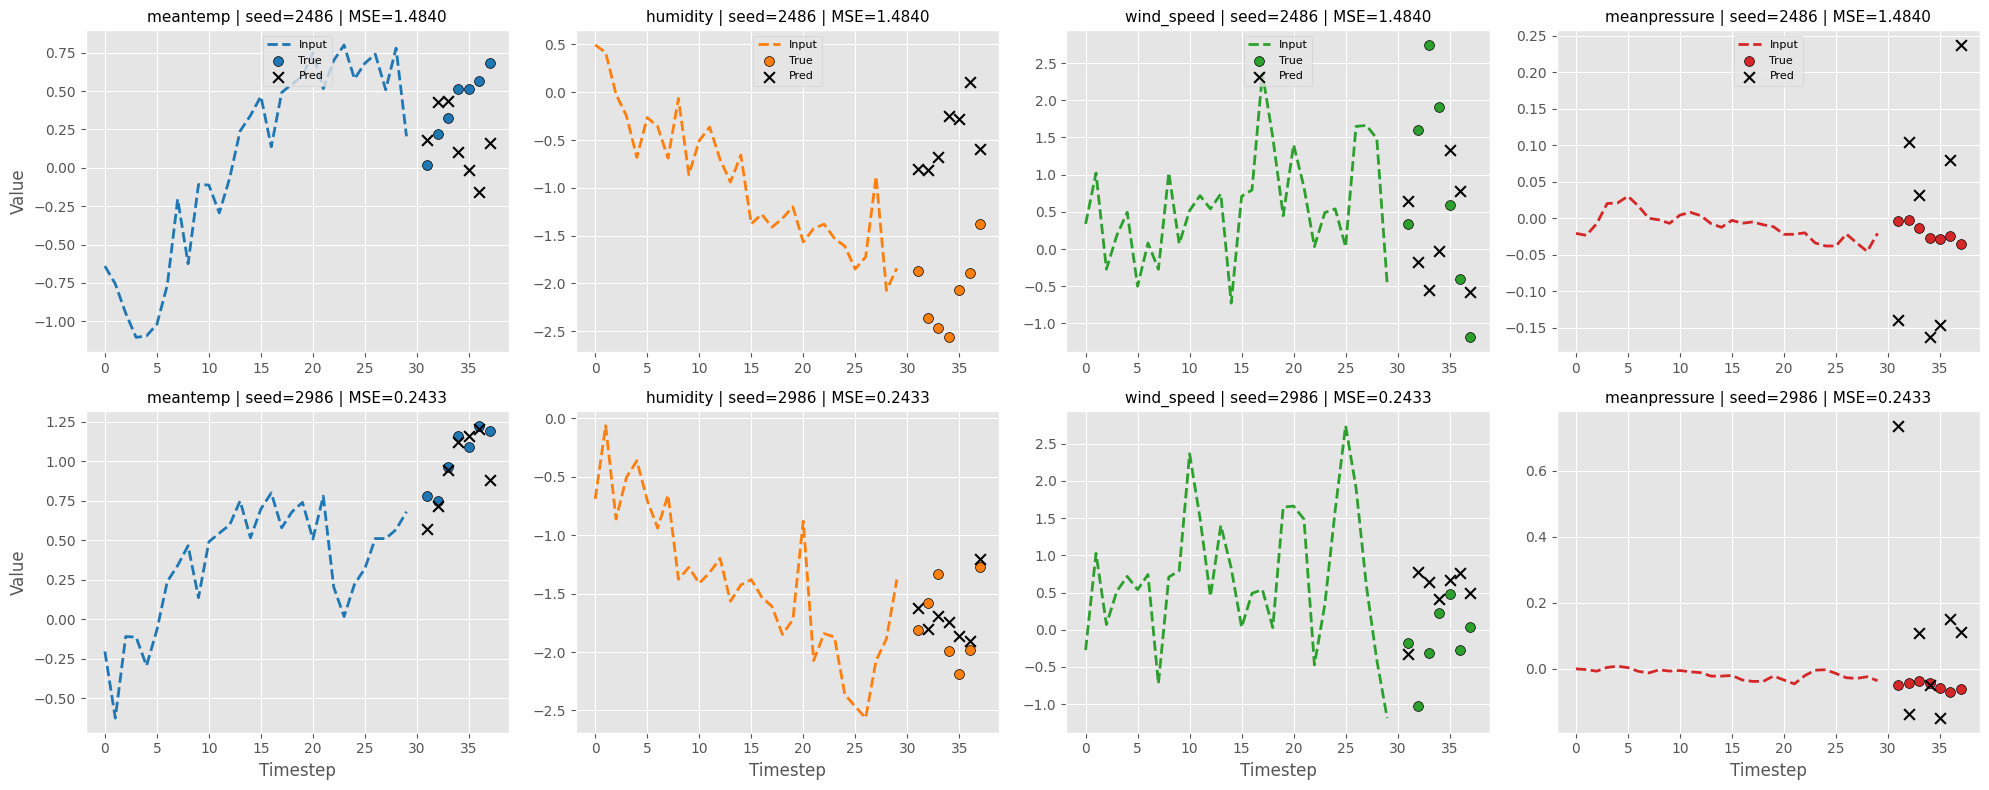

In [24]:
# Visualize
model_evaluation_and_visualizations(seq2seq_model_autoreg_lstm, test_dataloader, device)

### Model 5: Transformer Model

#### Load optimal hypermarameters

In [25]:
import sys
import os
import importlib
import config.config_Transformer as config

# Reload current version of the config file
importlib.reload(config)

INPUT_SIZE = config.INPUT_SIZE
OUTPUT_SIZE = config.OUTPUT_SIZE
N_INPUTS = config.N_INPUTS
N_OUTPUTS = config.N_OUTPUTS
HIDDEN_SIZE = config.HIDDEN_SIZE
NHEAD = config.NHEAD
NUMBER_LAYERS = config.NUMBER_LAYERS
DROPOUT_RATE = config.DROPOUT_RATE
LEARNING_RATE = config.LEARNING_RATE
NUM_EPOCHS = config.NUM_EPOCHS

print("Data dimensions:")
print("INPUT_SIZE:", INPUT_SIZE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("N_INPUTS:", N_INPUTS)
print("N_OUTPUTS:", N_OUTPUTS)
print("Model architecture parameters:")
print("HIDDEN_SIZE:", HIDDEN_SIZE)
print("NHEAD:", NHEAD)
print("NUMBER_LAYERS:", NUMBER_LAYERS)
print("DROPOUT_RATE:", DROPOUT_RATE)
print("Training hyperparameters:")
print("LEARNING_RATE:", LEARNING_RATE)
print("NUM_EPOCHS:", NUM_EPOCHS)

Data dimensions:
INPUT_SIZE: 4
OUTPUT_SIZE: 4
N_INPUTS: 30
N_OUTPUTS: 7
Model architecture parameters:
HIDDEN_SIZE: 64
NHEAD: 4
NUMBER_LAYERS: 2
DROPOUT_RATE: 0.2
Training hyperparameters:
LEARNING_RATE: 0.001
NUM_EPOCHS: 300


#### Load model

In [26]:
# Step 1: Rebuild the model architecture
from model_architecture_definition.seq2seq_Transformer import Seq2SeqTransformer

# Instantiate the Transformer model
seq2seq_transformer = Seq2SeqTransformer(
    input_dim=INPUT_SIZE,
    d_model=HIDDEN_SIZE,
    nhead=NHEAD,
    num_encoder_layers=NUMBER_LAYERS,
    num_decoder_layers=NUMBER_LAYERS,
    dropout=DROPOUT_RATE,
    output_dim=OUTPUT_SIZE
).to(device)

seq2seq_transformer.load_state_dict(torch.load('./models_weights_storage/seq2seq_Transformer.pth'))
seq2seq_transformer.eval() # Important for inference mode
print("Transformer model instantiated:")
print(seq2seq_transformer)

Transformer model instantiated:
Seq2SeqTransformer(
  (input_emb): TimeSeriesEmbedding(
    (linear): Linear(in_features=4, out_features=64, bias=True)
  )
  (target_emb): TimeSeriesEmbedding(
    (linear): Linear(in_features=4, out_features=64, bias=True)
  )
  (pos_encoder): PositionalEncoding()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )


/home/ubuntu/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


#### Load loss curve

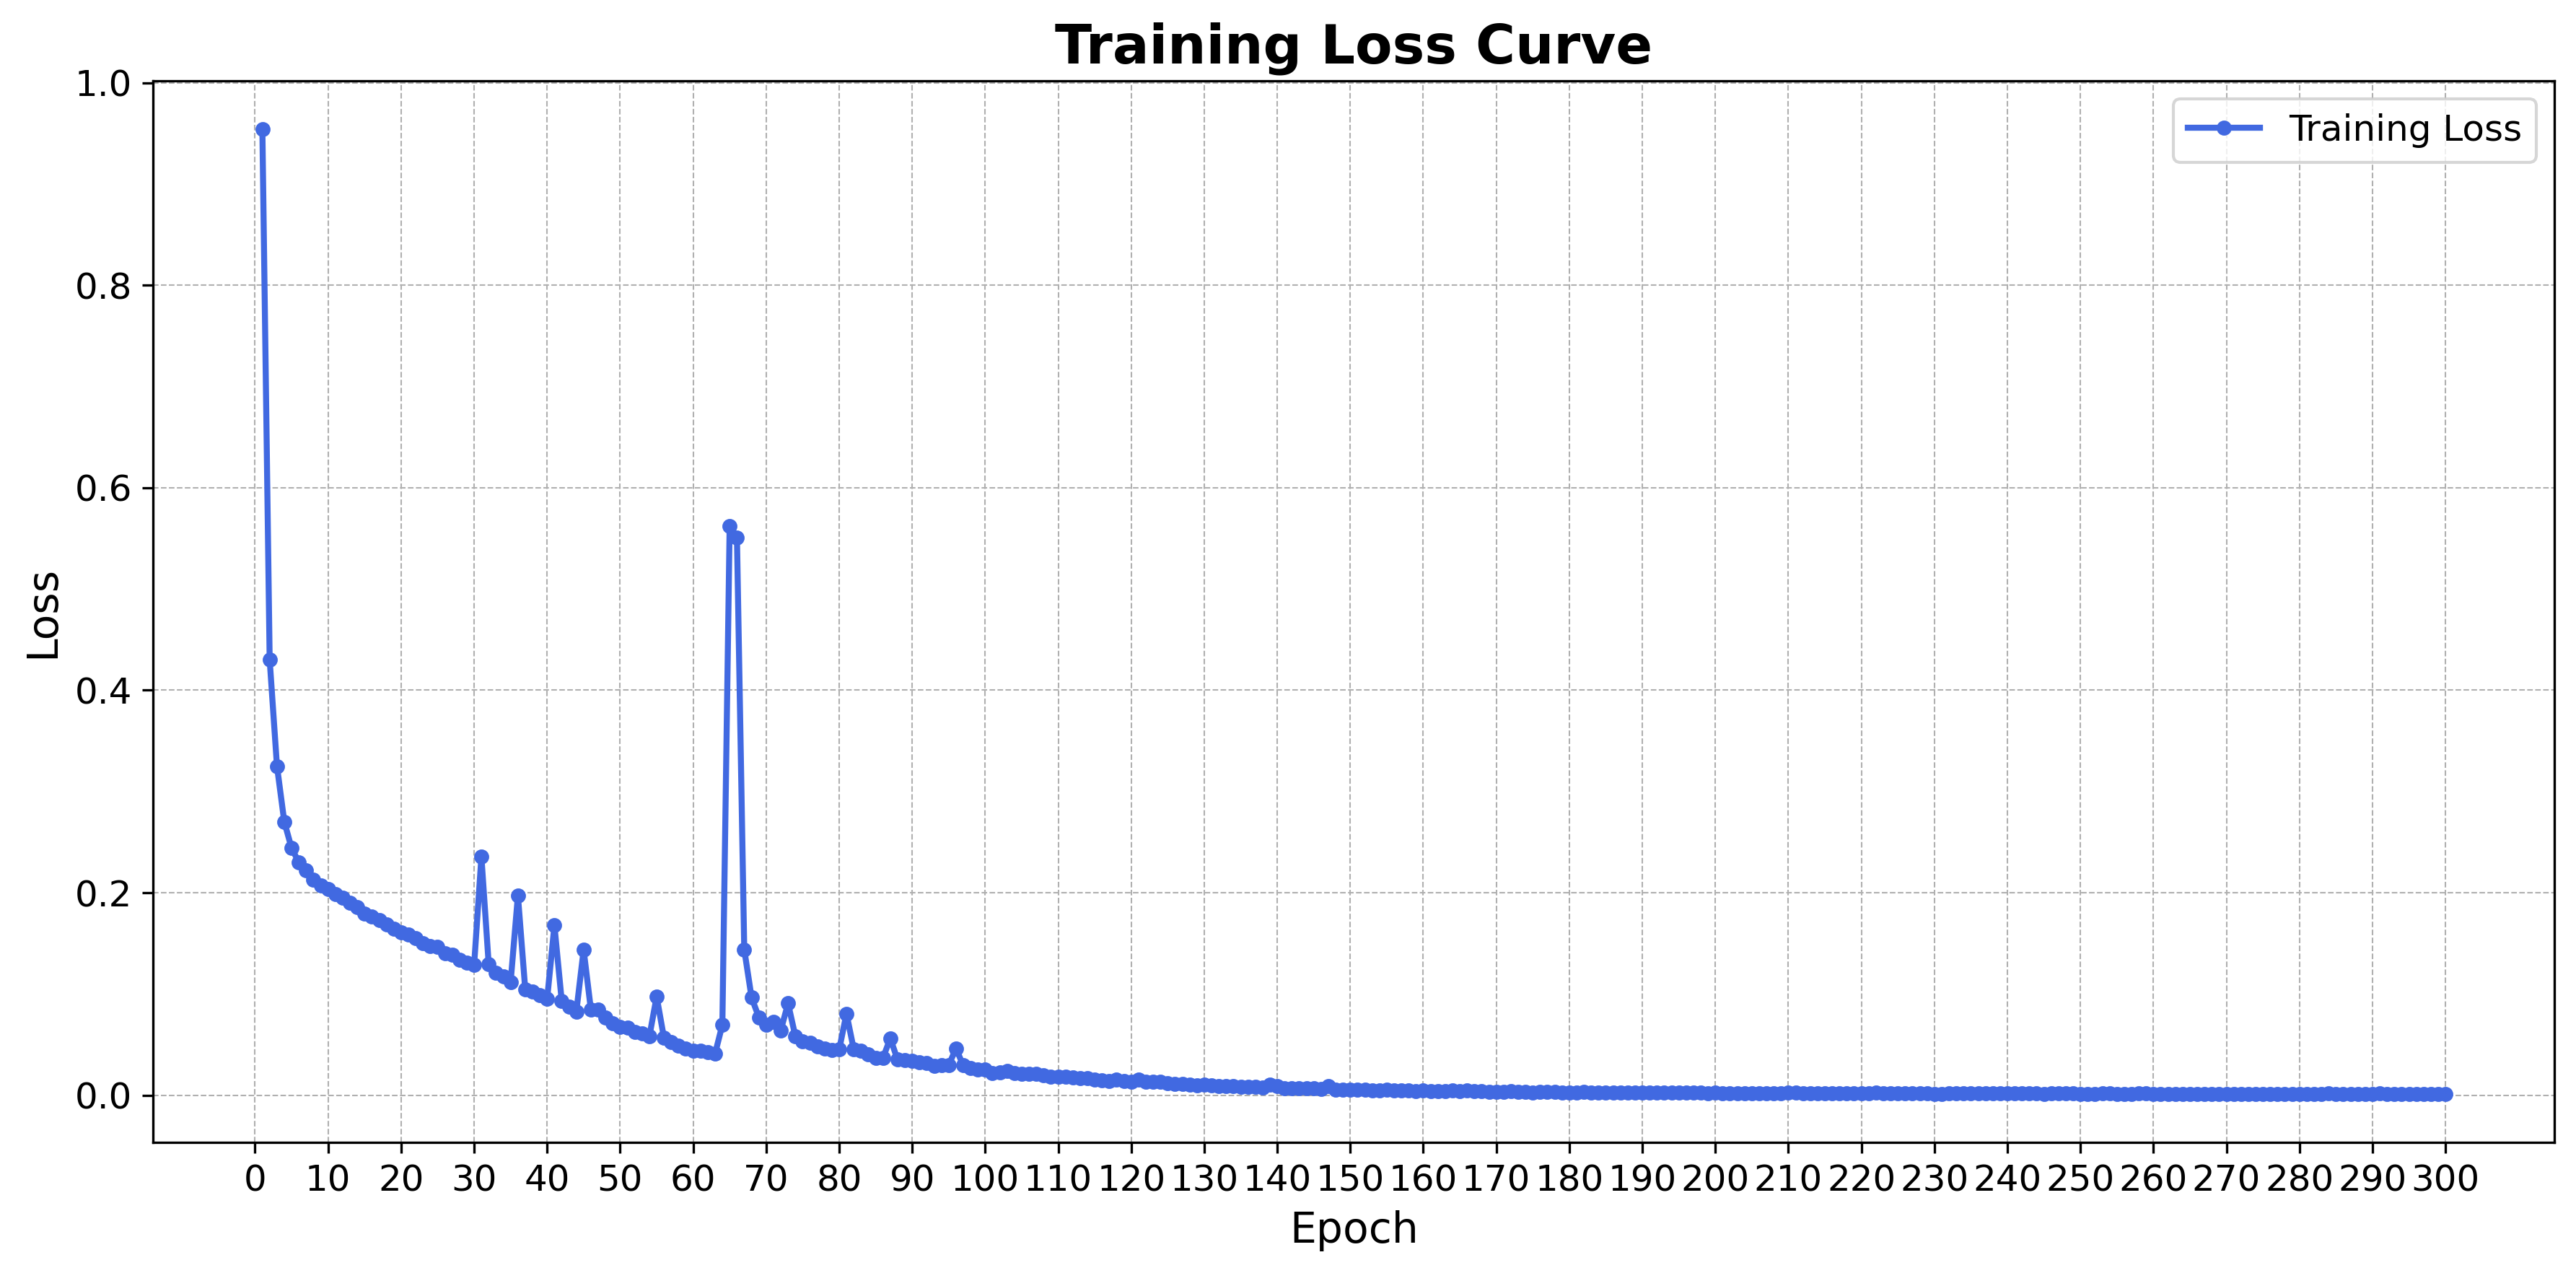

In [27]:
from utils.utils import load_image

image_path='./images_model_training_and_eval/seq2seq_Transformer_loss_training_curve.png'

load_image(image_path)

#### Model evaluation

In [28]:
from utils.transformer_model_evaluation import model_evaluation_and_visualizations

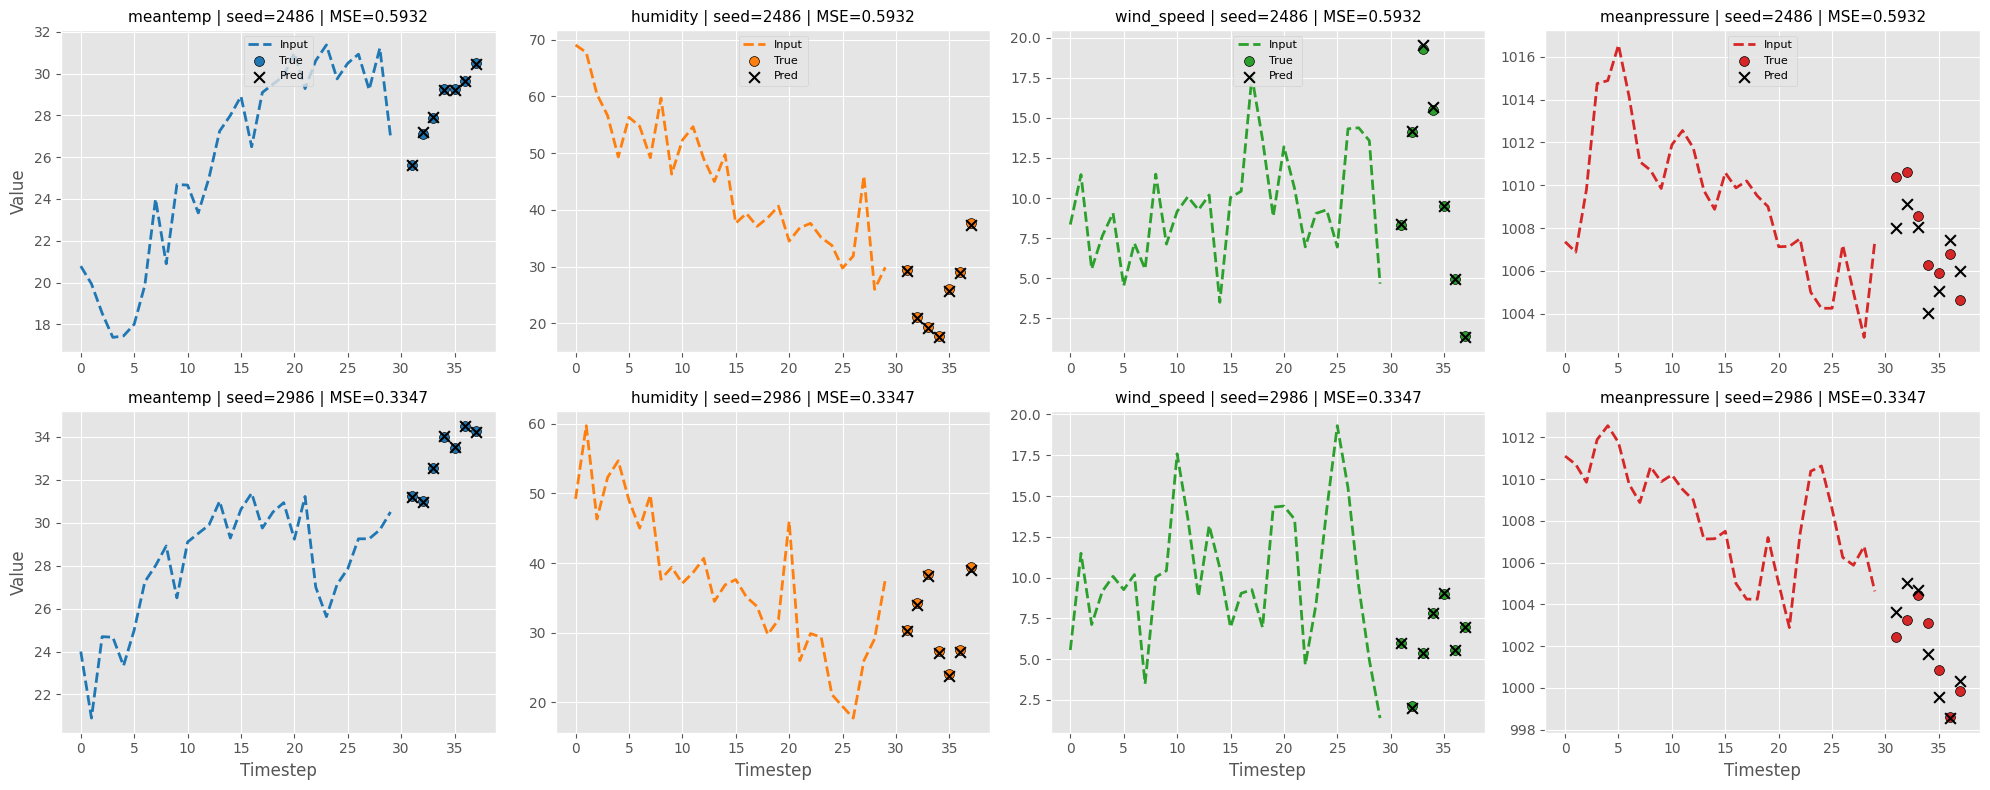

In [29]:
# Visualize
model_evaluation_and_visualizations(seq2seq_transformer, test_dataloader, device, stats=stats)